In [1]:
from nilearn import plotting, image, datasets
import overlap_viz as ov
import matplotlib.pyplot as plt

/home/zsuzsanna/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
networks_df = ov.read_groups('../../1803_NeuroHack/12_Network/groups.txt', '../../1803_NeuroHack/ROIlabels.txt')

In [3]:
networks_df

,Node,N0,N1,N2,N3,N4,N5,N6,N7,N8,...,bin_N3,bin_N4,bin_N5,bin_N6,bin_N7,bin_N8,bin_N9,bin_N10,bin_N11,NumConnections
1.0,1.0,0.0,0.000,0.0,0.000,0.998,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2.0,2.0,0.0,0.000,0.0,0.000,0.733,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3.0,3.0,0.0,0.000,0.0,0.000,0.921,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4.0,4.0,0.0,0.000,0.0,0.000,0.429,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
5.0,5.0,0.0,0.000,0.0,0.000,0.390,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930.0,996.0,0.0,0.000,0.0,0.760,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
931.0,997.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
932.0,998.0,0.0,0.000,0.0,0.602,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
933.0,999.0,0.0,0.269,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


(array([178.,   0., 373.,   0., 310.,   0.,  58.,   0.,  13.,   2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

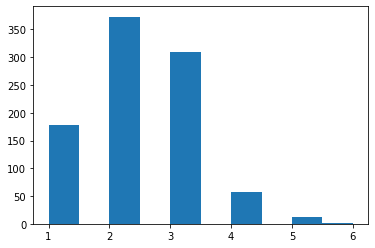

In [4]:
plt.hist(networks_df['NumConnections'])

In [5]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=1000)
atlas = image.load_img(atlas['maps'])

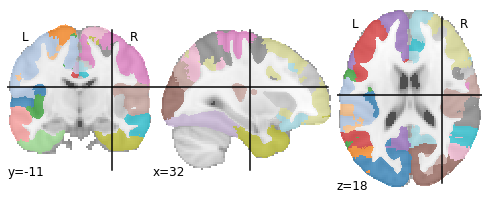

In [6]:
view = plotting.plot_roi(atlas, cmap='tab20')
view

In [7]:
bin_networks = ov.setup_bin_networks(networks_df, atlas, 12)

Creating binary network:  N0
Creating binary network:  N1
Creating binary network:  N2
Creating binary network:  N3
Creating binary network:  N4
Creating binary network:  N5
Creating binary network:  N6
Creating binary network:  N7
Creating binary network:  N8
Creating binary network:  N9
Creating binary network:  N10
Creating binary network:  N11


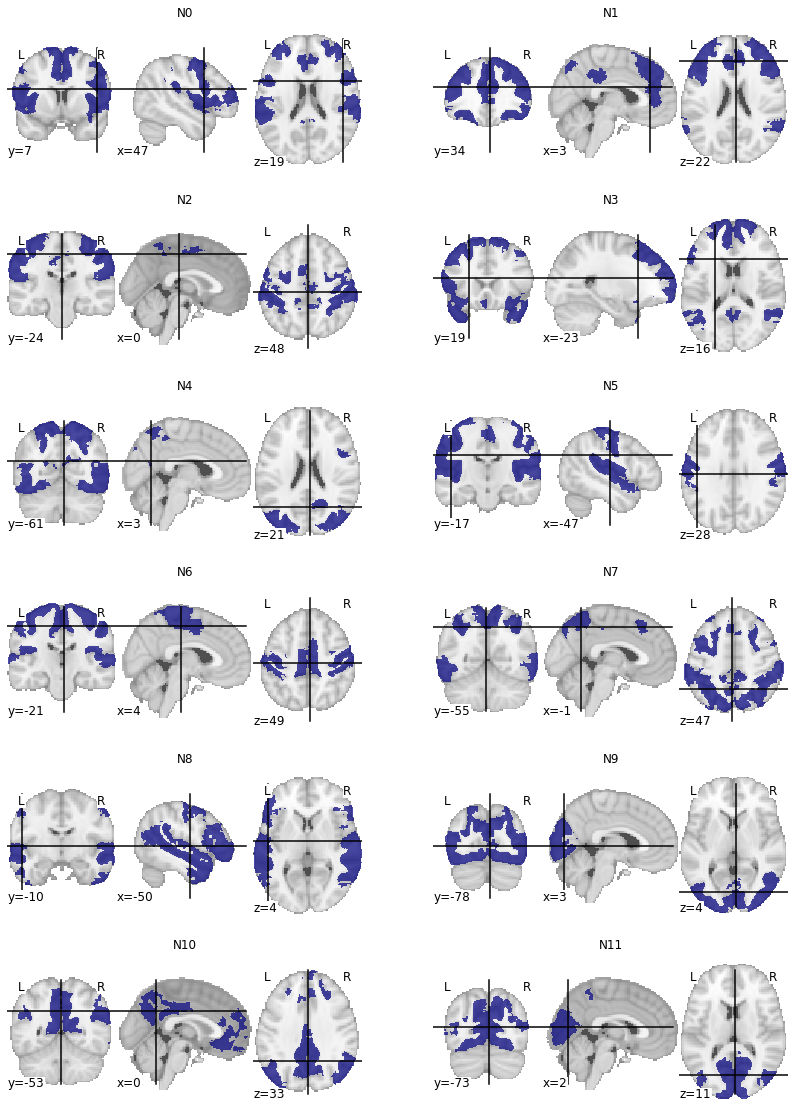

In [8]:
fig, axs = plt.subplots(6,2, figsize=(14, 20))

i=0
for ax, net in zip(axs.flatten(), bin_networks):
    img = image.new_img_like(atlas, net)
    plotting.plot_roi(img, figure=fig, axes=ax)
    ax.set_title('N{}'.format(i))
    i += 1

There is overlap between the networks.


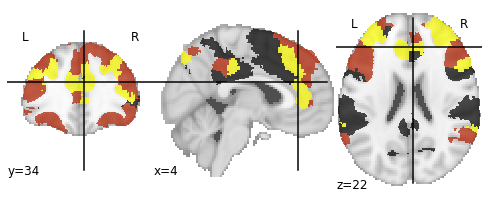

In [9]:
ov.visualize_network_overlap(bin_networks[0], bin_networks[1], atlas)